In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import LSTMCell, Dense, Input, RNN
from tensorflow.keras.datasets import mnist
import numpy as np

from rnn_layers import PhasedLSTM

import matplotlib.pyplot as plt

In [2]:
def transform_xy(X, y):
    img_size = X.shape
    time_steps = img_size[1]*img_size[2]
    x = tf.cast(tf.reshape(X, [-1, time_steps, 1]), dtype=tf.int32)    
    t = tf.tile([tf.range(time_steps)], [img_size[0], 1])
    t = tf.expand_dims(t, 2)
    X = tf.concat([t, x], axis=2)
    uniques, _ = tf.unique(y)
    n_classes = uniques.shape[0]
    y_one_hot = tf.one_hot(y, n_classes)
    return X, y_one_hot

In [3]:
(X, y), (X_test, y_test) = mnist.load_data()
X_train, y_train = X[:-10000], y[:-10000]
X_val, y_val = X[10000:], y[10000:]

# Transforming input and labels
X_train, y_train = transform_xy(X_train, y_train)
X_val, y_val     = transform_xy(X_val, y_val)
X_test, y_test   = transform_xy(X_test, y_test)

In [4]:
phased_model = tf.keras.Sequential()
phased_model.add(RNN(PhasedLSTM(32), input_shape=(28 * 28, 2)))
phased_model.add(Dense(10, activation='softmax'))
# model.summary()
lstm_model = tf.keras.Sequential()
lstm_model.add(RNN(LSTMCell(32), input_shape=(28 * 28, 2)))
lstm_model.add(Dense(10, activation='softmax'))

In [5]:
phased_model.compile(optimizer="rmsprop", 
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

lstm_model.compile(optimizer="rmsprop", 
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [6]:
history_lstm = lstm_model.fit(X_train,
                              y_train,
                              batch_size=256,
                              epochs=10,
                              validation_data=(X_val, y_val))

Epoch 1/10
196/196 [==============================] - 243s 1s/step - loss: 2.2460 - accuracy: 0.1875 - val_loss: 2.1688 - val_accuracy: 0.1856
Epoch 2/10
196/196 [==============================] - 244s 1s/step - loss: 2.1333 - accuracy: 0.1804 - val_loss: 2.0958 - val_accuracy: 0.1832
Epoch 3/10
196/196 [==============================] - 244s 1s/step - loss: 2.0719 - accuracy: 0.1822 - val_loss: 2.0484 - val_accuracy: 0.1881
Epoch 4/10
196/196 [==============================] - 242s 1s/step - loss: 2.0313 - accuracy: 0.1882 - val_loss: 2.0092 - val_accuracy: 0.2095
Epoch 5/10
196/196 [==============================] - 243s 1s/step - loss: 2.0047 - accuracy: 0.1943 - val_loss: 1.9977 - val_accuracy: 0.1854
Epoch 6/10
196/196 [==============================] - 243s 1s/step - loss: 1.9908 - accuracy: 0.1938 - val_loss: 2.0028 - val_accuracy: 0.2020
Epoch 7/10
196/196 [==============================] - 244s 1s/step - loss: 1.9815 - accuracy: 0.1917 - val_loss: 1.9773 - val_accuracy: 0.2083

In [7]:
history_phased = phased_model.fit(X_train,
                                  y_train,
                                  batch_size=256,
                                  epochs=10,
                                  validation_data=(X_val, y_val))

Epoch 1/10
196/196 [==============================] - 737s 4s/step - loss: 1.6987 - accuracy: 0.4141 - val_loss: 1.2582 - val_accuracy: 0.5846
Epoch 2/10
196/196 [==============================] - 734s 4s/step - loss: 1.0874 - accuracy: 0.6293 - val_loss: 0.9403 - val_accuracy: 0.6751
Epoch 3/10
196/196 [==============================] - 735s 4s/step - loss: 0.8696 - accuracy: 0.7056 - val_loss: 0.8294 - val_accuracy: 0.7102
Epoch 4/10
196/196 [==============================] - 736s 4s/step - loss: 0.7583 - accuracy: 0.7494 - val_loss: 0.7632 - val_accuracy: 0.7566
Epoch 5/10
196/196 [==============================] - 737s 4s/step - loss: 0.6982 - accuracy: 0.7734 - val_loss: 0.6600 - val_accuracy: 0.7838
Epoch 6/10
196/196 [==============================] - 735s 4s/step - loss: 0.6142 - accuracy: 0.8016 - val_loss: 0.8584 - val_accuracy: 0.7248
Epoch 7/10
196/196 [==============================] - 737s 4s/step - loss: 0.5611 - accuracy: 0.8197 - val_loss: 0.5502 - val_accuracy: 0.8222

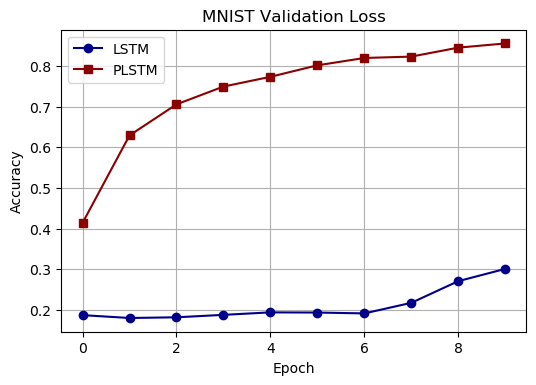

In [13]:
plt.figure(dpi=100)
plt.plot(history_lstm.history['accuracy'], label='LSTM', marker='o', color='darkblue')
plt.plot(history_phased.history['accuracy'], label='PLSTM', marker='s', color='darkred')
plt.legend()
plt.grid(True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('MNIST Validation Loss')

plt.savefig('mnist.png', format='png')
plt.show()
